In [11]:
import numpy as np
import h5py
import math
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Layer, ReLU, LeakyReLU
from tensorflow.keras import backend as K

In [12]:
from func import load_model, save_model

## Load dataset

In [16]:
filename = './BKG_4e6_dataset.h5'

In [17]:
# make sure input data has correct input shape - background training data
with h5py.File(filename, 'r') as file:
    X_train = np.array(file['X_train'])
    X_test = np.array(file['X_test'])
    X_val = np.array(file['X_val'])

In [18]:
len(X_test)

800000

## Define Dense NN architecture

In [19]:
input_shape = 57
latent_dimension = 3
num_nodes=[16,8]

In [20]:
#encoder
inputArray = Input(shape=(input_shape))
x = Dense(num_nodes[0], use_bias=False)(inputArray)
x = Activation('relu')(x)
x = Dense(latent_dimension, use_bias=False)(x)
encoder = Activation('relu')(x)

#decoder
x = Dense(num_nodes[0], use_bias=False)(encoder)
x = Activation('relu')(x)
decoder = Dense(input_shape)(x)

#create autoencoder
autoencoder = Model(inputs = inputArray, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 57)]              0         
                                                                 
 dense (Dense)               (None, 16)                912       
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 48        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 16)                48        
                                                                 
 activation_2 (Activation)   (None, 16)                0     

2021-11-19 14:09:46.784595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/root/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2021-11-19 14:09:46.788180: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
autoencoder.compile(optimizer = keras.optimizers.Adam(), loss='mse')

## Train model

In [22]:
EPOCHS = 10
BATCH_SIZE = 1024

In [23]:
history = autoencoder.fit(X_train, X_train, epochs = EPOCHS, batch_size = BATCH_SIZE,
                  validation_data=(X_val, X_val))

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 32.0191 - val_loss: 30.0847
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 29.4073 - val_loss: 29.1332
Epoch 3/10
2500/2500 [==============================] - 6s 3ms/step - loss: 28.4520 - val_loss: 28.1451
Epoch 4/10
2500/2500 [==============================] - 7s 3ms/step - loss: 27.5462 - val_loss: 27.2670
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 26.7612 - val_loss: 26.5569
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 26.1270 - val_loss: 25.9699
Epoch 7/10
2500/2500 [==============================] - 7s 3ms/step - loss: 25.6373 - val_loss: 25.5436
Epoch 8/10
2500/2500 [==============================] - 6s 3ms/step - loss: 25.2769 - val_loss: 25.2296
Epoch 9/10
2500/2500 [==============================] - 6s 3ms/step - loss: 25.0164 - val_loss: 25.0083
Epoch 10/10
2500/2500 [==============================] - 7s 3ms

In [24]:
model_name = 'DENSE_AE_model_4e6'
model_directory = './models'
save_model(model_directory+model_name, autoencoder)

## Prediction - background

In [25]:
bkg_prediction = autoencoder.predict(X_test)

## Prediction - signals

In [26]:
# add correct signal labels
signal_labels = ['Ato4l_lepFilter_13TeV_dataset',
                 'hChToTauNu_13TeV_PU20.h5_dataset',
                 'hToTauTau_13TeV_PU20.h5_dataset',
                 'leptoquark_LOWMASS_lepFilter_13TeV_dataset']

In [27]:
# add correct path to signal files
signals_file = ['signals/Ato4l_lepFilter_13TeV_dataset.h5',
                'signals/hChToTauNu_13TeV_PU20.h5_dataset.h5',
                'signals/hToTauTau_13TeV_PU20.h5_dataset.h5',
                'signals/leptoquark_LOWMASS_lepFilter_13TeV_dataset.h5']

In [28]:
# read signal data
signal_data = []
for i, label in enumerate(signal_labels):
    with h5py.File(signals_file[i], 'r') as file:
        test_data = np.array(file['Data'])
    signal_data.append(test_data)

In [70]:
#Siiani on data failid ümber konfigureeritud juba kasutades create_datasets.py. 
#Vaatan algseid data faile. Seal HDF failis peaks leidma "Particles" dictonary alt.
#Kõik signaalid on pandud lihtsalt nelja järjestikusse listi. Igas signaalis 57 elementi on ühe eventi andemd
#Algsetes failides on ADC challenge ehituse järgi event vormistatud, kus on 19 rida ja
#4 veergu[Pt,eta,phi,type(MET, 4 e/y, 4 muon,10 jets)]

list

In [39]:
print(signal_data[0])

[[33.11053467  0.         -0.74813551 ...  0.          0.
   0.        ]
 [51.77582932  0.          1.00145316 ...  0.          0.
   0.        ]
 [26.15893364  0.          0.88123262 ...  0.          0.
   0.        ]
 ...
 [15.01069355  0.          3.14070511 ...  0.          0.
   0.        ]
 [11.38910961  0.          2.40444589 ...  0.          0.
   0.        ]
 [18.02002716  0.          1.32340837 ...  0.          0.
   0.        ]]


In [29]:
# add correct signal labels
data_labels  = ['Ato4l_lepFilter_13TeV_input',
                 'hChToTauNu_13TeV_PU20.h5_input',
                 'hToTauTau_13TeV_PU20.h5_input',
                 'leptoquark_LOWMASS_lepFilter_13TeV_input',
                 'background_for_training.h5_input']

In [30]:
# add correct path to signal files
data_path = ['/home/aadi/praktika/ADC/files/Ato4l_lepFilter_13TeV.h5',
                '/home/aadi/praktika/ADC/files/hChToTauNu_13TeV_PU20.h5',
                '/home/aadi/praktika/ADC/files/hToTauTau_13TeV_PU20.h5',
                '/home/aadi/praktika/ADC/files/leptoquark_LOWMASS_lepFilter_13TeV.h5',
                '/home/aadi/praktika/ADC/files/background_for_training.h5']

In [31]:
#Loen kõik info välja signaalidest ja backgroundist algsel kujul
# read data
data_input = []
for i, label in enumerate(data_labels):
    with h5py.File(data_path[i], 'r') as file:
        test_data = np.array(file['Particles'][:,:,:])
    data_input.append(test_data)
    

In [32]:
signals_and_bkg=[]
for k, label in enumerate(data_labels):
    print(k)
    MET=[]
    ELEKT=[]
    MUON=[]
    JETID=[]
    packed=[]
    for i in range(len(data_input[k])):
        met_per_event=0
        elekt_per_event=0
        muon_per_event=0
        jets_per_event=0
    
        for j in range(19):#EVENT 19 cardinality
            j_object=data_input[k][i][j][3]
            if j_object==1:
                met_per_event +=1
            if j_object==2:
                elekt_per_event +=1
            if j_object==3:
                muon_per_event +=1
            if j_object==4:
                jets_per_event +=1
                #met_per_event +=1
    
        MET.append(met_per_event)
        ELEKT.append(elekt_per_event)
        MUON.append(muon_per_event)
        JETID.append(jets_per_event)
    packed.append(MET)
    packed.append(ELEKT)
    packed.append(MUON)
    packed.append(JETID)
    signals_and_bkg.append(packed)
    

        

0
1
2
3
4


In [8]:
#import pickle as pkl
#with open('signals_and_bkg_fix2','rb') as f:
#    signals_and_bkg = pkl.load(f)

In [54]:
print(signal_data[0][0])#create dataset formaadis. ADC challenge formaat on tõmmatud lihtsalt üheks listiks

[33.11053467  0.         -0.74813551 35.70671082 -1.15925384 -3.04864454
 10.23510647 -1.09288561  0.85873055  0.          0.          0.
  0.          0.          0.         16.21948433 -1.6871525   2.607409
  5.20224714 -1.32771921 -2.1664927   0.          0.          0.
  0.          0.          0.         40.6937294  -1.18197584 -3.0474906
 21.17095566 -3.67802596 -0.19795834 18.88846016 -1.6806736   2.63907623
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [55]:
print(data_input[0][0])#raw formaadis

[[33.11053467  0.         -0.74813551  1.        ]
 [35.70671082 -1.15925384 -3.04864454  2.        ]
 [10.23510647 -1.09288561  0.85873055  2.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [16.21948433 -1.6871525   2.607409    3.        ]
 [ 5.20224714 -1.32771921 -2.1664927   3.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [40.6937294  -1.18197584 -3.0474906   4.        ]
 [21.17095566 -3.67802596 -0.19795834  4.        ]
 [18.88846016 -1.6806736   2.63907623  4.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


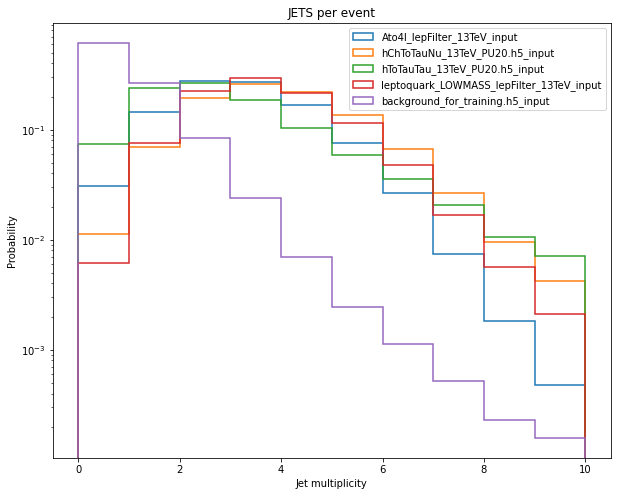

In [40]:
bin_size=10
bins = np.linspace(0, 10, 11)

plt.figure(figsize=(10,8))
for i, label in enumerate(data_labels):
    plt.hist(signals_and_bkg[i][3], bins=bins, label=label, density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.xlabel("Jet multiplicity")
plt.ylabel("Probability")
plt.title('JETS per event')
plt.legend(loc='best')
plt.show()

In [42]:
#NLep graafik ka Nlep(muon+elektron)Ehk võtame välja  signals_and_bkg-st need ja liidame.
Nlep=[]
for i, label in enumerate(data_labels):
    a=np.array(signals_and_bkg[i][1])
    b=np.array(signals_and_bkg[i][2])
    binn=a+b
    Nlep.append(binn)
    

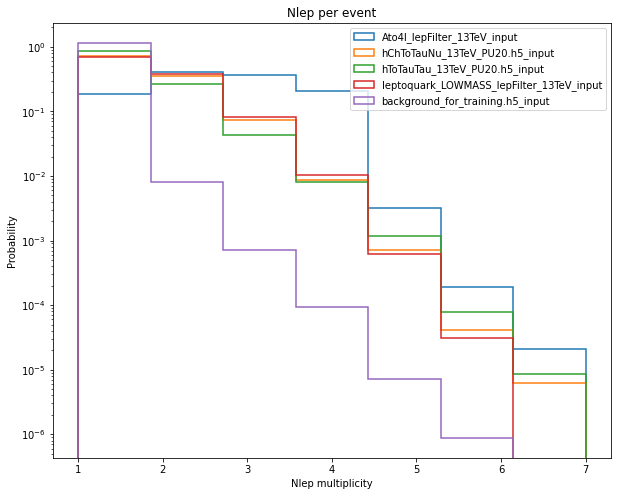

In [54]:
bin_size=6#linspace
bins = np.linspace(1, 7, 8)
plt.figure(figsize=(10,8))
for i, label in enumerate(data_labels):
    plt.hist(Nlep[i], bins=bins, label=label, density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.xlabel("Nlep multiplicity")
plt.ylabel("Probability")
plt.title('Nlep per event')
plt.legend(loc='best')
plt.show()

In [55]:
#Nüüd teha MET graafik phi-st sõltuvana. Phi vaja välja filtreerida per event ja signaali tüübi järgi.MET on igas 
#igas eventis ainult üks seega võtame jõuga välja
MET_phi=[]
MET_Pt=[]
for i, label in enumerate(data_labels):
    METPHI=[]
    METPT=[]
    for j in range(len(data_input[i])):
        phi=data_input[i][j][0][2]
        pt=data_input[i][j][0][0]
        METPHI.append(phi)
        METPT.append(pt)
        
    MET_phi.append(METPHI)
    MET_Pt.append(METPT)
    

In [13]:
len(MET_phi[3])

340544

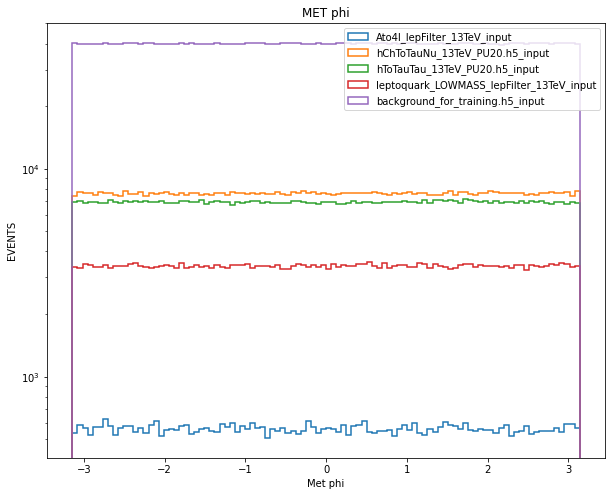

In [56]:
bin_size=100
plt.figure(figsize=(10,8))
for i, label in enumerate(data_labels):
    plt.hist(MET_phi[i], bins=bin_size, label=label, histtype='step', fill=False, linewidth=1.5,log=True)
plt.yscale('log')
plt.xlabel("Met phi")
plt.ylabel("EVENTS")
plt.title('MET phi')
plt.legend(loc='best')
plt.show()

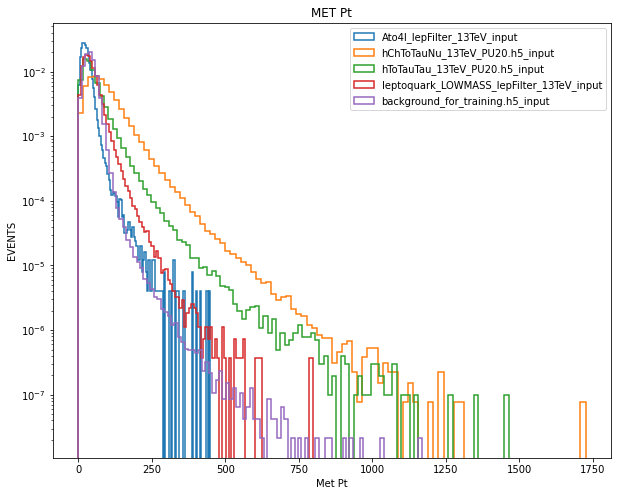

In [58]:
bin_size=100
plt.figure(figsize=(10,8))
for i, label in enumerate(data_labels):
    plt.hist(MET_Pt[i], bins=bin_size, density=True,label=label, histtype='step', fill=False, linewidth=1.5,log=True)
plt.yscale('log')
plt.xlabel("Met Pt")
plt.ylabel("EVENTS")
plt.title('MET Pt')
plt.legend(loc='best')
plt.show()

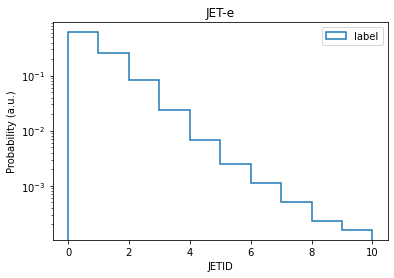

In [227]:
bin_size=10
label='label'
plt.hist(JETID, bins=bin_size, label=label, density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.xlabel("JETID")
plt.ylabel("Probability (a.u.)")
plt.title('JET-e')
plt.legend(loc='best')
plt.show()

In [57]:
Atol4l=signal_data[0]
CHtoTAU=signal_data[1]
HtoTAU=signal_data[2]
leptoquark=signal_data[3]


In [58]:
print(Atol4l[0])

[33.11053467  0.         -0.74813551 35.70671082 -1.15925384 -3.04864454
 10.23510647 -1.09288561  0.85873055  0.          0.          0.
  0.          0.          0.         16.21948433 -1.6871525   2.607409
  5.20224714 -1.32771921 -2.1664927   0.          0.          0.
  0.          0.          0.         40.6937294  -1.18197584 -3.0474906
 21.17095566 -3.67802596 -0.19795834 18.88846016 -1.6806736   2.63907623
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [60]:
signal_results = []

for i, label in enumerate(signal_labels):
    signal_prediction = autoencoder.predict(signal_data[i])
    signal_results.append([label, signal_data[i], signal_prediction]) # save [label, true, prediction] for signal

## Save results

In [61]:
save_file = 'DENSE_AE_4e6_results'

In [62]:
with h5py.File(save_file, 'w') as file:
    file.create_dataset('BKG_input', data=X_test)
    file.create_dataset('BKG_predicted', data = bkg_prediction)
    for i, sig in enumerate(signal_results):
        file.create_dataset('%s_input' %sig[0], data=sig[1])
        file.create_dataset('%s_predicted' %sig[0], data=sig[2])

In [64]:
##LOAD DATA
import h5py
filename = "DENSE_AE_4e6_results"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    
    ##GET DATA
    X_test=np.array(f['BKG_input'])
    bkg_prediction = np.array(f['BKG_predicted'])
    

Keys: <KeysViewHDF5 ['Ato4l_lepFilter_13TeV_dataset_input', 'Ato4l_lepFilter_13TeV_dataset_predicted', 'BKG_input', 'BKG_predicted', 'hChToTauNu_13TeV_PU20.h5_dataset_input', 'hChToTauNu_13TeV_PU20.h5_dataset_predicted', 'hToTauTau_13TeV_PU20.h5_dataset_input', 'hToTauTau_13TeV_PU20.h5_dataset_predicted', 'leptoquark_LOWMASS_lepFilter_13TeV_dataset_input', 'leptoquark_LOWMASS_lepFilter_13TeV_dataset_predicted']>


In [ ]:
# Üritan aru saada, mis formaadis see välja spewib data. Input tehti pmst üheks 1-d listiks.
#Välja tuleb samamoodi list ehk siis loss võetakse eventide kaupa ja võrreldakse.
#

In [103]:
print(signal_results[0][2][0])
testin=signal_results[0][2][0]
np.reshape(testin, (19, 3))

[ 3.8027233e+01  1.7939461e-02  8.4495850e-02  2.1583263e+01
 -4.4297550e-02 -1.3333882e-01  4.0836620e-01  1.7409533e-02
  1.5877811e-02 -4.6203353e-02  1.7038979e-02  3.3097793e-03
 -3.3206534e-02  2.4998903e-02  2.9515551e-02  7.5778800e-01
  4.6268333e-02 -1.7200768e-02  1.6399844e-01  5.2769955e-02
 -1.4873118e-02 -1.4038172e-02 -1.0972067e-03 -4.5001153e-03
 -7.6382719e-02  5.4786708e-03 -4.9886249e-02  4.9629196e+01
  1.1632582e-01  3.4293517e-02  1.7446241e+01  1.1382711e-02
  2.2838024e-02  6.0160303e+00 -5.0936636e-02 -1.4545754e-01
  2.8279107e+00  4.8856344e-04 -4.4224981e-02  1.3661926e+00
 -7.4589752e-02 -2.6615715e-02  7.1185583e-01  2.4797682e-02
  3.4870815e-02  4.2041588e-01 -1.5572808e-02  1.2618743e-02
  3.0926871e-01 -5.5393368e-02 -1.1542925e-02  1.5462387e-01
 -9.6780825e-03  5.0595026e-02  7.0101812e-02  1.7747775e-02
 -2.4169011e-04]


array([[ 3.8027233e+01,  1.7939461e-02,  8.4495850e-02],
       [ 2.1583263e+01, -4.4297550e-02, -1.3333882e-01],
       [ 4.0836620e-01,  1.7409533e-02,  1.5877811e-02],
       [-4.6203353e-02,  1.7038979e-02,  3.3097793e-03],
       [-3.3206534e-02,  2.4998903e-02,  2.9515551e-02],
       [ 7.5778800e-01,  4.6268333e-02, -1.7200768e-02],
       [ 1.6399844e-01,  5.2769955e-02, -1.4873118e-02],
       [-1.4038172e-02, -1.0972067e-03, -4.5001153e-03],
       [-7.6382719e-02,  5.4786708e-03, -4.9886249e-02],
       [ 4.9629196e+01,  1.1632582e-01,  3.4293517e-02],
       [ 1.7446241e+01,  1.1382711e-02,  2.2838024e-02],
       [ 6.0160303e+00, -5.0936636e-02, -1.4545754e-01],
       [ 2.8279107e+00,  4.8856344e-04, -4.4224981e-02],
       [ 1.3661926e+00, -7.4589752e-02, -2.6615715e-02],
       [ 7.1185583e-01,  2.4797682e-02,  3.4870815e-02],
       [ 4.2041588e-01, -1.5572808e-02,  1.2618743e-02],
       [ 3.0926871e-01, -5.5393368e-02, -1.1542925e-02],
       [ 1.5462387e-01, -9.6780

In [92]:
print((data_input[0][0]))#raw formaadis

[[33.11053467  0.         -0.74813551  1.        ]
 [35.70671082 -1.15925384 -3.04864454  2.        ]
 [10.23510647 -1.09288561  0.85873055  2.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [16.21948433 -1.6871525   2.607409    3.        ]
 [ 5.20224714 -1.32771921 -2.1664927   3.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [40.6937294  -1.18197584 -3.0474906   4.        ]
 [21.17095566 -3.67802596 -0.19795834  4.        ]
 [18.88846016 -1.6806736   2.63907623  4.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


## Evaluate results

1. Plot loss distribution after prediction (check loss value for signals)
2. Plot ROC curves - how good is anomaly detection for chosen FPR threshold

# 1.

In [65]:
from func import mse_loss

In [66]:
#compute loss value (true, predicted)##1 väljund ja plot roc nr 3.
total_loss = []
total_loss.append(mse_loss(X_test, bkg_prediction.astype(np.float32)).numpy())
for i, signal_X in enumerate(signal_data):
    total_loss.append(mse_loss(signal_X, signal_results[i][2].astype(np.float32)).numpy())

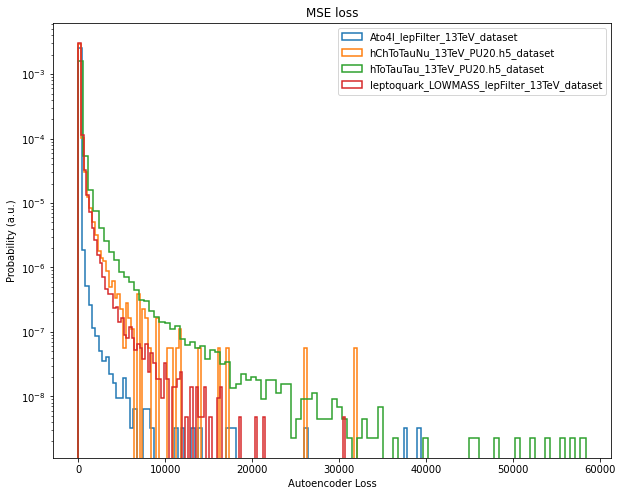

In [67]:
bin_size=100

plt.figure(figsize=(10,8))
for i, label in enumerate(signal_labels):
    plt.hist(total_loss[i], bins=bin_size, label=label, density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.xlabel("Autoencoder Loss")
plt.ylabel("Probability (a.u.)")
plt.title('MSE loss')
plt.legend(loc='best')
plt.show()

# 2.

In [68]:
from sklearn.metrics import roc_curve, auc

In [69]:
labels = np.concatenate([['Background'], np.array(signal_labels)])

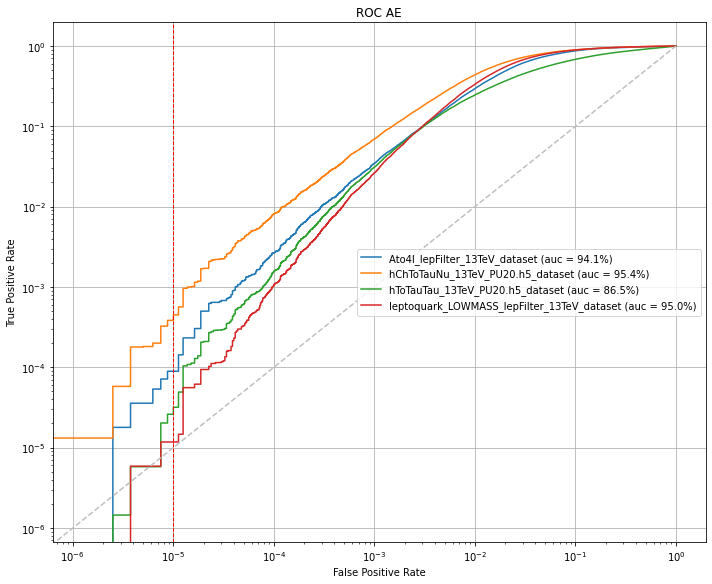

In [70]:
target_background = np.zeros(total_loss[0].shape[0])

plt.figure(figsize=(10,8))
for i, label in enumerate(labels):
    if i == 0: continue # background events
    
    trueVal = np.concatenate((np.ones(total_loss[i].shape[0]), target_background)) # anomaly=1, bkg=0
    predVal_loss = np.concatenate((total_loss[i], total_loss[0]))

    fpr_loss, tpr_loss, threshold_loss = roc_curve(trueVal, predVal_loss)

    auc_loss = auc(fpr_loss, tpr_loss)
    
    plt.plot(fpr_loss, tpr_loss, "-", label='%s (auc = %.1f%%)'%(label,auc_loss*100.), linewidth=1.5)
    
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc='center right')
    plt.grid(True)
    plt.tight_layout()
plt.plot(np.linspace(0, 1),np.linspace(0, 1), '--', color='0.75')
plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
plt.title("ROC AE")
plt.show()